In [8]:
#C:/Users/onlin/Pictures/image super reslution final/dataset/train
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
%matplotlib inline
import random
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from keras import backend as K

seed = 21
random.seed = seed
np.random.seed = seed

In [9]:
clear_frames = 'C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/train/HR'
bad_frames = 'C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/train/LR'

In [10]:
clean_frames = []
for file in tqdm(sorted(os.listdir(clear_frames))):
    if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
        image = tf.keras.preprocessing.image.load_img(clear_frames + '/' + file, target_size=(128,128))
        image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
        clean_frames.append(image)

clean_frames = np.array(clean_frames)
blurry_frames = []
blur_factor=5
for file in tqdm(sorted(os.listdir(bad_frames))):
    if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
        image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(128,128))
        image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255


        blurry_frames.append(image)

blurry_frames = np.array(blurry_frames)

100%|██████████████████████████████████████████████████████████████████████████████████| 685/685 [00:02<00:00, 292.67it/s]


In [11]:
class_names = ['HR','LR']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (256,256)

In [13]:
#C:\Users\onlin\Downloads\archive\dataset
def load_data():

    datasets = ['C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/train', 'C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))
        for i in range(3):
            r = random.randint(0, len(clean_frames)-1)
            m, result = blurry_frames[r],clean_frames[r]

    return output


In [14]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/train


100%|██████████████████████████████████████████████████████████████████████████████████| 685/685 [00:04<00:00, 140.92it/s]


Loading C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/test


100%|██████████████████████████████████████████████████████████████████████████████████| 685/685 [00:04<00:00, 139.94it/s]


297


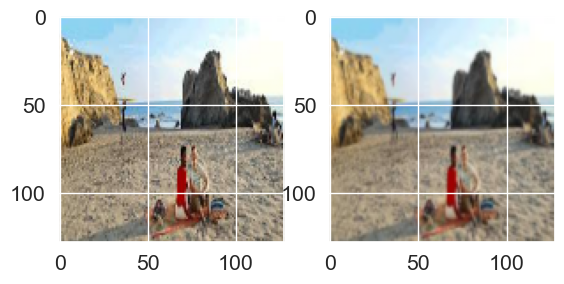

In [16]:
r = random.randint(0, len(clean_frames)-1)
print(r)
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.2)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(clean_frames[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(blurry_frames[r])

In [17]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1370
Number of testing examples: 1370
Each image is of size: (256, 256)


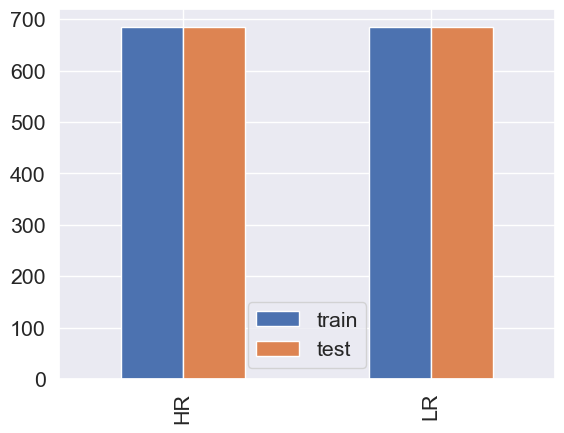

In [18]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
def display_examples(class_names, images, labels):


    fig = plt.figure(figsize=(10,10))
    fig.suptitle("images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

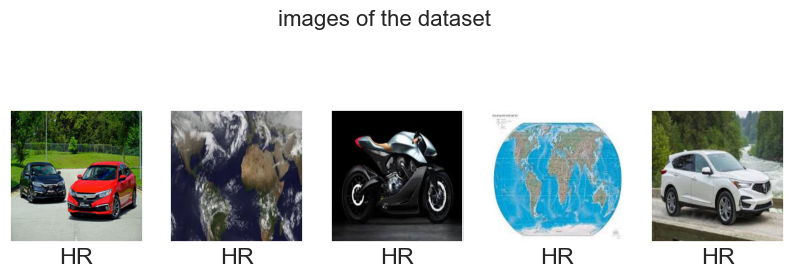

In [21]:
display_examples(class_names, train_images, train_labels)

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk

In [23]:

# create the generator model
def create_generator(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(inputs)
    x = Activation('relu')(x)
    x = Conv2D(128, kernel_size=3, strides=1, padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
    x = Activation('relu')(x)
    outputs = Conv2D(3, kernel_size=3, strides=1, padding='same')(x)

    return Model(inputs, outputs)


def create_discriminator(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(inputs)
    x = Activation('relu')(x)
    x = Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

#load HR and LR images with labels
def load_dataset(dataset_dir):
    hr_images = []
    lr_images = []
    labels = []

    hr_dir = os.path.join(dataset_dir, "HR")
    lr_dir = os.path.join(dataset_dir, "LR")

    for filename in os.listdir(hr_dir):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            hr_img = tf.keras.preprocessing.image.load_img(os.path.join(hr_dir, filename))
            hr_img = tf.keras.preprocessing.image.img_to_array(hr_img)
            hr_images.append(hr_img)
            labels.append(0)  

    for filename in os.listdir(lr_dir):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            lr_img = tf.keras.preprocessing.image.load_img(os.path.join(lr_dir, filename))
            lr_img = tf.keras.preprocessing.image.img_to_array(lr_img)
            lr_images.append(lr_img)
            labels.append(1)  

    return np.array(hr_images), np.array(lr_images), np.array(labels)

# Train the GAN
def train_gan(hr_images, lr_images, epochs=100, batch_size=16):
    input_shape = lr_images.shape[1:]

    # create and compile generator and discriminator
    generator = create_generator(input_shape)
    discriminator = create_discriminator(input_shape)
    generator.compile(optimizer=Adam(), loss='mean_squared_error')
    discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train GAN model
    for epoch in range(epochs):
        idx = np.random.randint(0, hr_images.shape[0], batch_size)
        hr_batch = hr_images[idx]
        lr_batch = lr_images[idx]
        fake_hr_batch = generator.predict(lr_batch)

        d_loss_real = discriminator.train_on_batch(hr_batch, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_hr_batch, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        g_loss = generator.train_on_batch(lr_batch, hr_batch)

        print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

    return generator

In [24]:
def display_input_and_result_images(lr_image, hr_image):
    plt.subplot(1, 2, 1)
    plt.imshow(lr_image)
    plt.title('Input LR Image      ')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hr_image)
    plt.title('      Result  HR Image (Super-Resolution)')
    plt.axis('off')

    plt.show()


In [25]:
# browse for selecting LR image
def browse_lr_image():
    root = Tk()
    root.withdraw()  # Hide the root window

    file_path = filedialog.askopenfilename(title="Select LR Image", filetypes=[("Image Files", "*.png; *.jpg; *.jpeg")])

    if file_path:
        lr_image = tf.keras.preprocessing.image.load_img(file_path, target_size=(256, 256))
        lr_image = tf.keras.preprocessing.image.img_to_array(lr_image)
        lr_image /= 255.0  # Normalize
        return lr_image
    else:
        return None


In [ ]:
def main():
    # Load dataset
    dataset_dir = "C:/Users/nihan/OneDrive/Desktop/PROJECT/image super reslution final/image super reslution final/dataset/train"
    hr_images, lr_images, labels = load_dataset(dataset_dir)

    # Normalize images
    hr_images = hr_images.astype('float32') / 255.0
    lr_images = lr_images.astype('float32') / 255.0

    # Train GAN
    generator = train_gan(hr_images, lr_images)

    # Save the trained generator model
    generator.save("final_model.h5")

    # Select LR image 
    lr_image = browse_lr_image()

    if lr_image is not None:
        # Convert LR image to HR image
        hr_image = generator.predict(np.expand_dims(lr_image, axis=0))[0]

        # Display images
        display_input_and_result_images(lr_image, hr_image)
    else:
        print("No LR image selected.")

main()



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Epoch 1/100, Discriminator Loss: 3.8484718799591064, Generator Loss: 0.3925258219242096
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 2/100, Discriminator Loss: 15.05354118347168, Generator Loss: 0.2596063017845154
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 3/100, Discriminator Loss: 41.549896240234375, Generator Loss: 0.1896549016237259
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 4/100, Discriminator Loss: 73.65663146972656, Generator Loss: 0.15107837319374084
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 5/100, Discriminator Loss: 84.20584106445312, Generator Loss: 0.129954531788826
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 6/100, Discriminator Loss: 76.43018341064453, Generator Loss: 0.11323627829551697
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 7/100, Discriminator Loss: 72.65980529785156, Generator Loss: 0.09909383207559586
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 8/100, Discriminator Loss: 68.76961517333984, Generator Loss: 0.08871880173683167
1/1 ━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model

def main1():
    model_path = "final_model.h5"
    generator = load_model(model_path)
    # Select LR image 
    lr_image = browse_lr_image()

    if lr_image is not None:
        # Convert LR image to HR image
        hr_image = generator.predict(np.expand_dims(lr_image, axis=0))[0]

        # Display images
        display_input_and_result_images(lr_image, hr_image)
    else:
        print("No LR image selected.")

main1()



# FINAL EXTENTION

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import io
import base64
from flask import Flask, render_template, request

app = Flask(__name__)

# Load the model
model_path = "final_model.h5"
generator = load_model(model_path)

# convert image to base64
def image_to_base64(image):
    img = Image.fromarray((image * 255).astype(np.uint8))
    buffered = io.BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

# Display LR and HR images
@app.route('/', methods=['GET', 'POST'])
def index():
    lr_image = None
    hr_image = None
    if request.method == 'POST':
        if 'lr_image' in request.files:
            lr_image_file = request.files['lr_image']
            if lr_image_file.filename != '':
                lr_image = process_lr_image(lr_image_file)
                if lr_image is not None:
                    hr_image = generator.predict(np.expand_dims(lr_image, axis=0))[0]
                    lr_image = image_to_base64(lr_image)
                    hr_image = image_to_base64(hr_image)
    return render_template('index.html', lr_image=lr_image, hr_image=hr_image)

def process_lr_image(lr_image_file):
    # Load  LR image
    lr_image = Image.open(lr_image_file)
    lr_image = lr_image.resize((256, 256))
    
    # LR image to RGB if it has an alpha channel
    if lr_image.mode == 'RGBA':
        lr_image = lr_image.convert('RGB')
        
    lr_image = np.array(lr_image)
    lr_image = lr_image.astype(np.float32) / 255.0  
    return lr_image

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:24:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:24:19] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:24:35] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:24:46] "GET / HTTP/1.1" 200 -
ERROR:__main__:Exception on / [POST]
Traceback (most recent call last):
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_a

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:25:56] "POST / HTTP/1.1" 200 -
ERROR:__main__:Exception on / [POST]
Traceback (most recent call last):
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\nihan\OneDrive\Desktop\PROJECT\image super reslution final\venv310\lib\site-packages\flask\app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  File "C:\Users\nihan\AppData\Local\T

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:26:49] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:26:56] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:27:06] "POST / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:29:26] "POST / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


INFO:werkzeug:127.0.0.1 - - [30/May/2025 16:30:31] "POST / HTTP/1.1" 200 -
